In [329]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime
from matplotlib.ticker import MaxNLocator
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

Data Retrieval

In [330]:

# Connect to Google
# Scope: Enable access to specific links
scope = ['https://www.googleapis.com/auth/spreadsheets', "https://www.googleapis.com/auth/drive"]

credentials = ServiceAccountCredentials.from_json_keyfile_name("./gscredentials.json", scope)

client = gspread.authorize(credentials)

# Open the Google Sheet
sheet_id = '1CxCLvg2CGSHYNWskSa8JlBOPmF4th4XPEQQfy6AouYw'

sheet = client.open_by_key(sheet_id)

worksheet = sheet.get_worksheet(0)  # Assuming you want to work with the first worksheet

data = worksheet.get_all_values()

#names = [row[0] for row in data[1:]]  # Assuming first row contains headers


Data Structures

In [331]:
class TreeNode:
    def __init__(self, name):
            self.name = name
            self.value = None
            self.children = []
            self.parent = None
    def add_child(self, child):
          child.parent = self
          self.children.append(child)
    def print_tree(self):
        prefix = '-'*self.get_level()
        print(prefix + self.name + ", " + str(self.value))
        if len(self.children) > 0:
            for child in self.children:
                child.print_tree()
    def get_level(self):
        if self.parent == None:
            return 0
        level = self.parent.get_level() + 1
        return level
    def get_child(self, name):
        for child in self.children:
            if child.name == name:
                return child

#takes in the database and the tree heirarchy
def build_user_tree(data):
     users = TreeNode("users")
     #iterates through each row of data, skipping over the headers, using the timestamp as a marker of a data entry
     i=1
     while(data[i][0] != ''):
        #compares each row of data if it matches any existing user, row  is the email
        entry = create_data_entry(data[i])
        if user_match(data[i],users):
             #adds this row to the tree of data
             user_match(data[i],users).get_child("data").add_child(entry)
        else:
             #create and append a user to an existing tree of users
             user = create_new_user(users)
             users.add_child(user)
             user.value = data[i][1]
             user.get_child("data").add_child(entry)
        i+=1
     return users
        
def user_match(row,users):
     if len(users.children) == 0:
        return 0
     for user in users.children:
        if row[1] == user.value:
            return user
     return 0
    
def create_data_entry(row):
    #if there is no timestamp, don't do it
    if row[0] != '':
        entry = TreeNode("entry")
        timestamp = TreeNode("timestamp")
        timestamp.value = (row[0])
        entry.add_child(timestamp)

        #make sure "workout" or '' do not show up. You can't check for type != string since all responses are str
        if row[2] != '' and row[2] != "workout":
            body_weight = TreeNode("body_weight")
            body_weight.value = (float(row[2]))
            entry.add_child(body_weight)
        else:
        #make sure that this is not an entry for a weight
        #if row[2] == "workout" and type(row[2]) != float and type(row[2]) != int:
            activity = TreeNode("activity")
            activity.value = row[3]
            entry.add_child(activity)

            # finish this later
            variants = TreeNode("variants")

            entry.add_child(variants)

            #if row[7] != '': # this shouldn't be necessary
            resistance_type = TreeNode("resistance_type")
            resistance_type.value = row[5]
            entry.add_child(resistance_type)

            if row[6] != '': # this shouldn't be necessary
                set_n = TreeNode("set_n")
                set_n.value = int(row[6])
                entry.add_child(set_n)

            if row[8] != '': # this shouldn't be necessary
                reps = TreeNode("reps")
                reps.value = int(row[8])
                entry.add_child(reps)

            if row[7] != '':
                weight = TreeNode("weight")
                weight.value = float(row[7])
                entry.add_child(weight)

            if row[9] != '':
                rpe = TreeNode("rpe")
                rpe.value = int(row[9])
                entry.add_child(rpe)
    return entry

def create_new_user(users):
    user = TreeNode("user"+str(len(users.children)))
    data = TreeNode("data")
    name = TreeNode("name")
    user.add_child(data)
    user.add_child(name)
    return user

if __name__ == '__main__':
    users = build_user_tree(data)
    #users.print_tree()
    pass

#steve_data = [row for row in data[1:] if row[10] == "sdimov77@gmail.com" or "Steven Dimov"]

#rows_body_weight = [row for row in steve_data if row[8] != '']  

Data Analysis

In [332]:

def get_coord_pairs_from_user(user, criteria, unix_output):
    coord_pairs = []
    x = []
    currx = 0
    y = []
    for child in users.get_child(user).get_child("data").children:
        if child.get_child(criteria):
            if unix_output == True:
                currx = int(datetime.strptime(child.get_child("timestamp").value, '%m/%d/%Y %H:%M:%S').timestamp())
                x.append(currx)
            else:
                currx = datetime.strptime(child.get_child("timestamp").value, '%m/%d/%Y %H:%M:%S')
                x.append(currx)
            y.append(child.get_child(criteria).value)
            coord_pairs.append([currx, child.get_child("body_weight").value])
    return coord_pairs, x, y

def calculate_prediction_intervals(Set, expected_values, confidence_level):

    #X_train, X_test, y_train, y_test = train_test_split(get_coord_pairs_from_user("user0", "body_weight", True)[1], y, test_size=0.2, random_state=42)

    #X_train = np.array(X_train).reshape(-1, 1)
    #X_test = np.array(X_test).reshape(-1, 1)
    #print(Set)
    y_pred = expected_values
    
    y = []
    x = []
    for pair in Set:
        x.append(pair[0])
        y.append(pair[1])
    
    #print(Set)
    #model = LinearRegression()
    #model.fit(Set, y)
    #predictions = model.predict(X_test)
    #mse = mean_squared_error(y_test, predictions)
    #r2 = r2_score(y_test, predictions)
    #y_pred = model.predict(np.array(Set).reshape(-1, 1))
    #y_pred = model.predict(Set)

    #print(X)
    #print(y_pred)
    mse = mean_squared_error(y, y_pred)

    # Calculate the standard error
    standard_error = np.sqrt(mse)
    # Assuming 95% confidence level (alpha = 0.05)
    alpha = 1-confidence_level
    critical_value = stats.t.ppf(1 - alpha/2, df=len(y)-1)
    prediction_intervals = []

    for i in range(len(y_pred)):
        lower_bound = y_pred[i] - (critical_value * standard_error)
        upper_bound = y_pred[i] + (critical_value * standard_error)
        prediction_intervals.append((lower_bound, upper_bound))
    return prediction_intervals

def fit_curve(Set, degree):
    y = []
    x = []
    for pair in Set:
        x.append(pair[0])
        y.append(pair[1])
    # Fit a polynomial of specified degree
    coeffs = np.polyfit(x, y, degree)
    
    # Generate y values based on the fitted polynomial
    y_fit = np.polyval(coeffs, x)
    
    return y_fit

Plotting

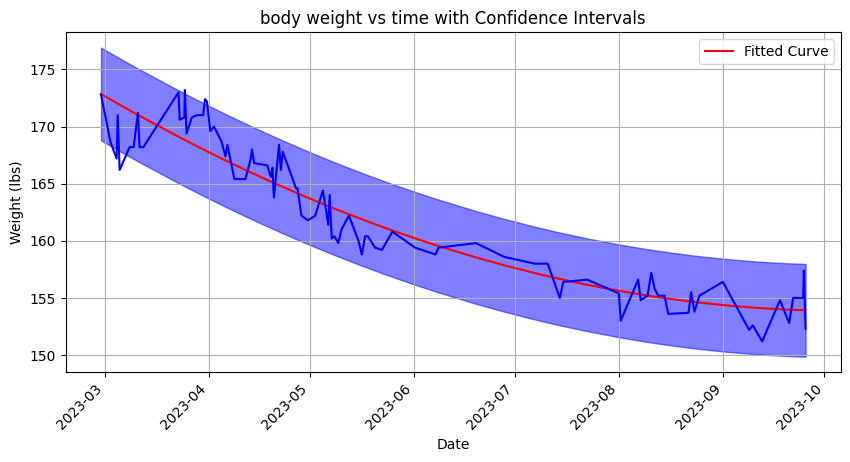

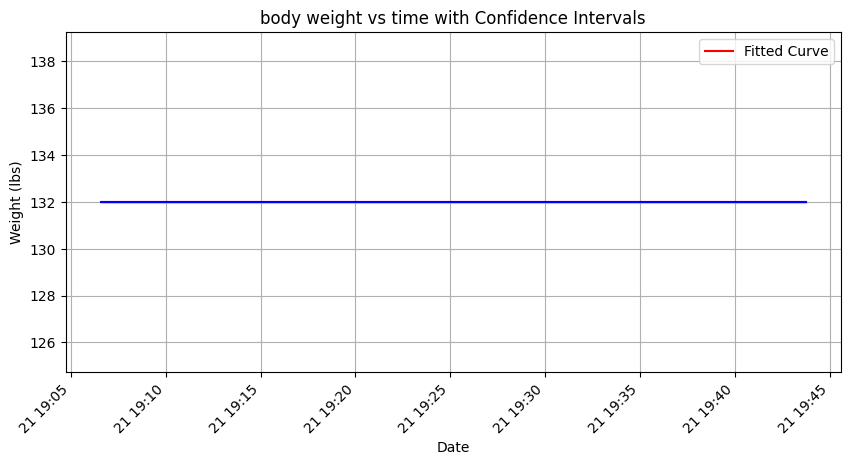

In [333]:


# Plotting

# given a set of data, and following attributes, plot them
def plot_desired_data(x_type, y_type, data_set, polynomial_degree, confidence_level):
    # data_set is a 2D array, polynomial_degree is a natural number, confidence_level is a float between 0 < x < 1

    y = []
    x = []
    for pair in data_set:
        if x_type == "time":
            # Convert to a datetime object
            dt_object = datetime.fromtimestamp(pair[0])
            #datetime.strptime(child.get_child("timestamp").value, '%m/%d/%Y %H:%M:%S')
            # Format the datetime object as a string
            
            #dt_object.strftime('%Y-%m-%d %H:%M:%S')
            #datetime.strptime(dt_object,'%Y-%m-%d %H:%M:%S')
            x.append(dt_object)
        else:
            x.append(pair[0])
        y.append(pair[1])
    
    #obtain curve of best fit
    y_fit = fit_curve(data_set, polynomial_degree)

    # Calculate prediction intervals
    upper = []
    lower = []
    for interval in calculate_prediction_intervals(data_set, y_fit, confidence_level):
        lower.append(interval[0])
        upper.append(interval[1])

    # Create the plot
    plt.subplots(figsize=(10, 5))
    
    #plt.scatter(x, y, label='Data')
    plt.plot(x, y_fit, color='red', label='Fitted Curve')
    plt.xlabel('Date')
    plt.gcf().autofmt_xdate()
    plt.ylabel('Weight (lbs)')
    plt.title(y_type + ' vs ' + x_type + ' with Confidence Intervals')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.plot(x, y, 'b')
    plt.fill_between(x, lower, upper, color='blue', alpha=0.5, label='Confidence Interval')
    plt.show()

data = get_coord_pairs_from_user("user0", "body_weight", True)[0]
plot_desired_data("time", "body weight", data, 2, 0.95)

data = get_coord_pairs_from_user("user1", "body_weight", True)[0]
plot_desired_data("time", "body weight", data, 2, 0.95)

#alex
#x = get_coord_pairs_from_user("user1", "body_weight")[1]
#y = get_coord_pairs_from_user("user1", "body_weight")[2]
#plt.plot(x, y, 'go')

In [334]:
sheet_id = '1CxCLvg2CGSHYNWskSa8JlBOPmF4th4XPEQQfy6AouYw'
xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")

tab1 = pd.read_excel(xls, 'data', header = 1)

tab1

,2023-02-26 20:10:24.513000,sdimov77@gmail.com,Unnamed: 2,Bench,straight,barbell,1,155,8,7,Unnamed: 10,Unnamed: 11,Unnamed: 12,155.1,6,1240,9670,44983
0,2023-02-26 20:12:48.526,sdimov77@gmail.com,NaN,Bench,straight,barbell,2.0,155.0,8.0,8.0,NaN,NaN,NaN,155.0,4.0,1240.0,9670.0,44983
1,2023-02-26 20:15:59.527,sdimov77@gmail.com,NaN,Bench,straight,barbell,3.0,155.0,8.0,9.0,NaN,NaN,NaN,155.0,6.0,1240.0,9670.0,44983
2,2023-02-26 20:19:36.136,sdimov77@gmail.com,NaN,Bench,straight,barbell,4.0,155.0,8.0,8.0,NaN,NaN,NaN,155.0,51.0,1240.0,9670.0,44983
3,2023-02-26 20:22:57.518,sdimov77@gmail.com,NaN,tricep pull,single arm,cable,1.0,25.0,3.0,8.0,NaN,NaN,NaN,NaN,NaN,75.0,9670.0,44983
4,2023-02-26 20:24:43.467,sdimov77@gmail.com,NaN,tricep pull,single arm,cable,2.0,20.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,120.0,9670.0,44983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,#VALUE!
745,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,#VALUE!
746,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,#VALUE!
747,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,#VALUE!
